In [1]:
# importing required libraries
%matplotlib inline
from keras.models import Sequential
from scipy.misc import imread
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Dense
import pandas as pd
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.applications.vgg16 import decode_predictions
import cv2

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

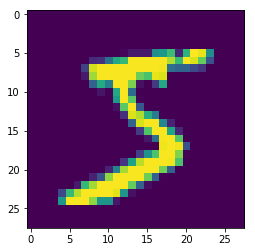

In [3]:
plt.imshow(x_train[0])

In [4]:
def convert(a):
    """
    Upscale mnist 28x28 image to 224x224 image and duplicate gray scale
    channel to fake it to RGB image
    @param a: np array of shape (28, 28)
    @return: np array of shape (224, 224, 3)
    """
    resized_a = cv2.resize(a, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
    stacked_a = np.stack((resized_a,)*3, -1)
    return stacked_a

In [5]:
new_x_train = []
for x in x_train:
    new_x_train.append(convert(x))
new_x_train = np.asarray(new_x_train)

In [6]:
new_x_train.shape

(60000, 224, 224, 3)

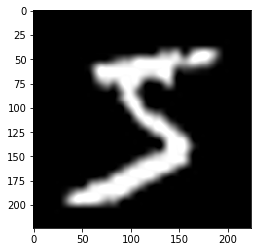

In [7]:
plt.imshow(new_x_train[0])

In [8]:
vgg16_model = VGG16(weights='imagenet', include_top=False)

In [9]:
features_train = vgg16_model.predict(new_x_train)

In [10]:
(features_train.shape)

(60000, 7, 7, 512)

In [11]:
new_x_test = []
for x in x_test:
    new_x_test.append(convert(x))
new_x_test = np.asarray(new_x_test)

In [12]:
new_x_test.shape

(10000, 224, 224, 3)

In [13]:
faetures_test = vgg16_model.predict(new_x_test)

In [14]:
features_test = faetures_test

In [15]:
from keras.layers import Dense, Activation

In [16]:
train_x = features_train.reshape(60000, 7*7*512)

In [17]:
train_x.shape

(60000, 25088)

In [18]:
y_train.shape

(60000,)

In [19]:
pd.get_dummies(y_train).shape

(60000, 10)

In [20]:
train_y = pd.get_dummies(y_train)

In [21]:
train_y.shape

(60000, 10)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_valid, Y_train, Y_valid=train_test_split(train_x,train_y,test_size=0.3, random_state=42)

In [24]:
from keras.layers import Dense, Activation

In [25]:
model = Sequential()

In [26]:
model.add(Dense(1000, input_dim=25088, activation='relu', kernel_initializer='uniform'))

In [28]:
model.add(keras.layers.core.Dropout(0.3, noise_shape=None, seed=None))

In [29]:
model.add(Dense(500,input_dim=1000,activation='sigmoid'))

In [30]:
model.add(keras.layers.core.Dropout(0.4, noise_shape=None, seed=None))

In [31]:
model.add(Dense(150,input_dim=500,activation='sigmoid'))

In [32]:
model.add(keras.layers.core.Dropout(0.2, noise_shape=None, seed=None))

In [33]:
model.add(Dense(units=10))

In [34]:
model.add(Activation('softmax'))

In [35]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
model.fit(X_train, Y_train, epochs=20, batch_size=128, validation_data=(X_valid, Y_valid))

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 15s 352us/step - loss: 0.2628 - acc: 0.9386 - val_loss: 0.0453 - val_acc: 0.9861
Epoch 2/20
42000/42000 [==============================] - 13s 311us/step - loss: 0.0502 - acc: 0.9869 - val_loss: 0.0325 - val_acc: 0.9894
Epoch 3/20
42000/42000 [==============================] - 11s 257us/step - loss: 0.0421 - acc: 0.9879 - val_loss: 0.0373 - val_acc: 0.9888
Epoch 4/20
42000/42000 [==============================] - 12s 279us/step - loss: 0.0370 - acc: 0.9893 - val_loss: 0.0284 - val_acc: 0.9911
Epoch 5/20
42000/42000 [==============================] - 12s 275us/step - loss: 0.0336 - acc: 0.9901 - val_loss: 0.0324 - val_acc: 0.9903
Epoch 6/20
42000/42000 [==============================] - 11s 268us/step - loss: 0.0327 - acc: 0.9900 - val_loss: 0.0314 - val_acc: 0.9901
Epoch 7/20
42000/42000 [==============================] - 11s 263us/step - loss: 0.0294 - acc: 0.9915 - val_loss: 0.

In [39]:
model.predict(features_test[0].reshape(1, 7*7*512))

array([[  7.01338720e-08,   4.74562694e-06,   5.94020321e-06,
          2.94125039e-06,   4.52031600e-07,   4.55816803e-07,
          2.53242538e-10,   9.99983311e-01,   1.89544679e-07,
          1.85629756e-06]], dtype=float32)

In [40]:
y_test[0]

7

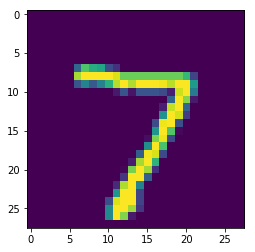

In [43]:
plt.imshow(x_test[0])